Importing libraries and data

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Ensuring graphs created are displayed within notebook without need to call specifically

%matplotlib inline

In [3]:
#Setting path

path = r"C:\Users\luiss\OneDrive\Career Foundry\Achievement 6 - Life Expectancy"

In [4]:
#Importing Data

lf = pd.read_csv(os.path.join(path, 'Data', 'LifeExpectancyClean.csv'))

In [5]:
#Data checks

lf.shape

(2864, 24)

In [6]:
lf.head()

,Unnamed: 0,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,...,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,LifeExp Category,Economy
0,0,Turkey,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,...,11006,78.53,4.9,4.8,7.8,0,1,76.5,High,Developing
1,1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,...,25742,46.44,0.6,0.5,9.7,1,0,82.8,High,Developed
2,2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,...,1076,1183.21,27.1,28.0,5.0,0,1,65.4,Middle,Developing
3,3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,...,4146,0.75,5.7,5.5,7.9,0,1,67.0,Middle,Developing
4,4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,...,33995,7.91,1.2,1.1,12.8,1,0,81.7,High,Developed


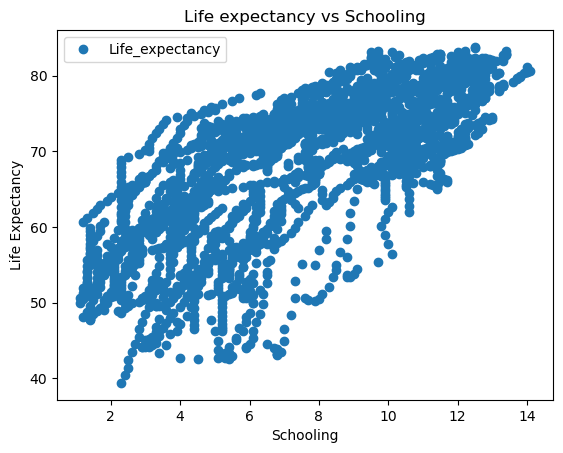

In [9]:
#Creating scatterplot of variables to check against life expectancy

lf.plot(x = 'Schooling', y = 'Life_expectancy', style = 'o')
plt.title('Life expectancy vs Schooling')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.show()

Hypothesis

The more schooling a population has, the longer their life expectancy

In [10]:
#Reshaping variables into numpy arrays

X = lf['Schooling'].values.reshape(-1,1)
y = lf['Life_expectancy'].values.reshape(-1,1)

In [11]:
#Splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
#Creating regression object

regression = LinearRegression()

In [13]:
#Fitting regression object onto training set

regression.fit(X_train, y_train)

LinearRegression()

In [14]:
#Predicting values of y using X

y_predicted = regression.predict(X_test)

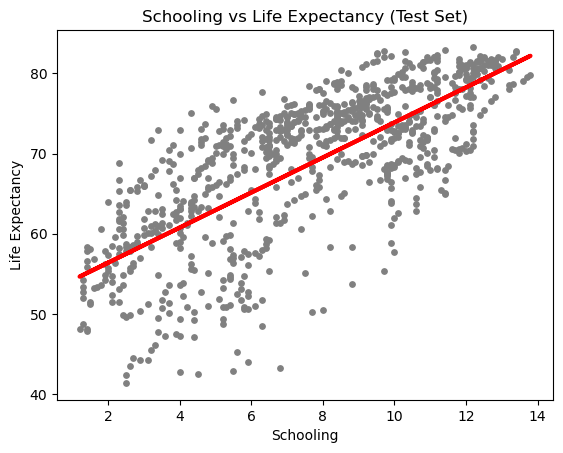

In [15]:
#Creating plot showing regression line from model on test set

plot_test = plt
plot_test.scatter(X_test, y_test, color = 'gray', s = 15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth = 3)
plot_test.title('Schooling vs Life Expectancy (Test Set)')
plot_test.xlabel('Schooling')
plot_test.ylabel('Life Expectancy')
plot_test.show()

The model fits where there is a high density of data points.  Further analysis on the outliers would be useful to see if there's a commanality where schooling isn't as correlated to life expectancy.

In [16]:
#Creating objects that contain model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [17]:
#Printing model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.18571581]]
Mean squared error:  40.184530992428776
R2 score:  0.5324638829657137


In [18]:
#Creating dataframe of actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,51.5,55.308156
1,68.1,67.548165
2,66.1,58.586730
3,52.5,64.269591
4,66.7,76.946743
5,54.7,56.619586
6,74.1,70.389596
7,64.1,73.668169
8,75.3,68.203880
9,57.5,64.925306


In [19]:
#Creating percent difference column

data['% Diff'] = (abs(data['Actual'] - data['Predicted']) / ((data['Actual'] + data['Predicted'])/2))*100

In [20]:
data.head(30)

,Actual,Predicted,% Diff
0,51.5,55.308156,7.130834
1,68.1,67.548165,0.813627
2,66.1,58.586730,12.051435
3,52.5,64.269591,20.158658
4,66.7,76.946743,14.266586
5,54.7,56.619586,3.448784
6,74.1,70.389596,5.135878
7,64.1,73.668169,13.890247
8,75.3,68.203880,9.889796
9,57.5,64.925306,12.130345


In [22]:
data.describe()

,Actual,Predicted,% Diff
count,860.000000,860.000000,860.000000
mean,69.067209,68.584855,7.751140
std,9.276294,6.921008,6.358424
min,41.400000,54.652442,0.003167
25%,63.100000,63.176733,3.134590
50%,71.600000,69.078166,6.272126
75%,75.700000,74.323884,10.595286
max,83.300000,82.192461,43.041008


After creating a %Diff column and using the describe function I can see that the average %Difference is 7.75% with 75% of values being 10.6% or lower.

Possible sources of error include the fact that this data set isn't the ideal size for this type of modeling, on top of the fact that the life expectancy value of a given country is already a modeled  value based off of many factors.  Anything related to human health is going to tend to be incredibly complex and need multiple factors to create an accurate model.